In [1]:
% pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Intro: Reliability of survey and voting results for low response rates

I will here briefly explore how we can get around the uncertainty around community surveys and votes where we don't have full participation. How can we ensure that the survey/voting result is not a fluke based on a low responds rate? 

# Example

Lets look at what the probability that with a higher than 50% majority in a sample mis-represent the true sentiment of the whole population. The idea is that if when we have a smaller sample size then the result can vary due to random fluctuation. 

To simplify the problem, I will only look at a yes/no answer here, and simulated what different results will be given that the true sentiment is 60% for yes and where 100 people respond. 

In [2]:
N_members = 1200
N_respondents = 100
p = 0.6
N_yes = int(N_members*p)
N_no = int(N_members*(1-p))

Now let's simulate different voting outcomes:

In [3]:
runs = 10000  # sufficient to get good statistics
votes_samples = np.vstack(([
            np.random.choice(
                np.hstack((np.ones(N_yes), np.zeros(N_no))), 
                size=N_respondents, replace=False, p=None)
            for i in range(runs)]))
results = np.mean(votes_samples, axis=1)

print('mean: %.3f Sigma: %.3f' % (np.mean(results), np.std(results)))
print('mean-2*sigma.: %.3f' % (np.mean(results)- 2*np.std(results)))

mean: 0.600 Sigma: 0.046
mean-2*sigma.: 0.508


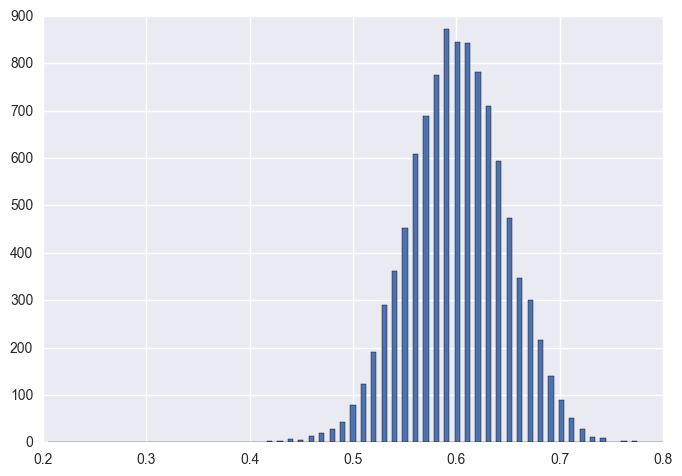

In [4]:
plt.hist(results, bins=59*2+1, range=[0.2, 0.8])
plt.show()

With with 2 standard deviations (sigma) margin, we have 98% certainty (only looking at one side of the bell curve) that the true sentiment is yes. So, if we have about 100 people then we can be pretty confident that the Majority of Sandbox is for if more than 60% votes responses are. 

# Generalization: what majority sentiment is required at different response rates?

Let's see what majority sentiment is required for 98% certainty that the result of a survey/vote correspond to the sentiment of all members.

In [12]:
runs = 50000
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
certain_result_two_percentile = []
certain_result_two_std = []
N_respondants_list = list(range(10, 20, 5)) + list(range(20, 100, 10)) + list(range(100, 500, 25))
for N_respondents in N_respondants_list:
    p = 0.5
    N_yes = int(N_members*p)
    N_no = int(N_members*(1-p))
    votes_samples = np.vstack(([
                np.random.choice(
                    np.hstack((np.ones(N_yes), np.zeros(N_no))),
                    size=N_respondents, replace=False, p=None)
                for i in range(runs)]))
    results = np.mean(votes_samples, axis=1)
    certain_result_two_percentile.append(np.sort(results)[-int(runs*0.02)])
    certain_result_two_std.append(0.5 + 2*np.std(results))

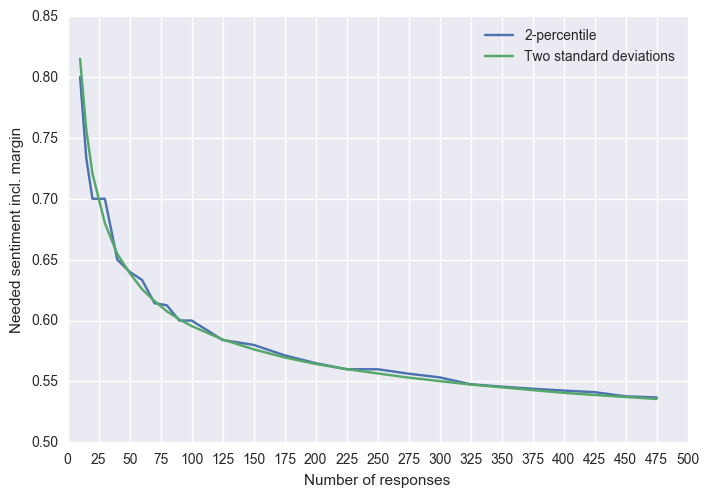

In [17]:
fig, ax = plt.subplots()
x = N_respondants_list
plt.plot(x, certain_result_two_percentile, '-', label='2-percentile')
plt.plot(x, certain_result_two_std, '-', label='Two standard deviations')

ax.xaxis.set_major_locator(MultipleLocator(25))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
plt.ylabel('Needed sentiment incl. margin')
plt.xlabel('Number of responses')
plt.legend()
plt.show()        

We can here see that the required majority goes steadily down as the number of respondents go up. At 25 responses a 70% majority is required, while with 300 respondents only a 55% majority is required. 

Note, I include both the two standard deviations result at the 2-percentile of the runs to validate the two standard deviations approach. 

# Conclusion

Assuming that all who vote represent the Sandbox community equally, then we can easily say if we can trust the result to be representative of the general population by including a margin threshold that any community vote/survey response needs to overcome. Now, we can take that into account when we judge the result of a popular vote or a survey, so that we make sure that we only act if there is a sufficient support for the proposal.

Caveat: The above assumes that the samples are perfectly representable from the general population. However, that is not so necessarily. It could be that the active members have other wants than the people who do not respond. Another thing that I have not touched on here is what difference it makes how informed/deliberated a given member is to what they will vote/respond.